In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
# Replace 'path/to/heart_disease.csv' with the actual path to your downloaded CSV file
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())



   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


In [5]:

# Identify and handle missing values
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(), inplace=True)

In [8]:
# Encode categorical data
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_columns)

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessed and ready for model training.")

Data preprocessed and ready for model training.


Logistic Regression Performance:
Correctly Classified Instances: 137
Incorrectly Classified Instances: 47
Accuracy: 0.7446
Precision: 0.7492
Recall: 0.7446
F1 Score: 0.7458
Mean Absolute Error: 0.3441
Root Mean Squared Error: 0.4250
Relative Absolute Error: 0.7069
Root Relative Squared Error: 0.8615
Kappa (F1 Macro Avg): 0.7405
ROC AUC: 0.8037
MCC: 0.4832

Confusion Matrix:
[[57 20]
 [27 80]]

Detailed Accuracy By Class:
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        77
           1       0.80      0.75      0.77       107

    accuracy                           0.74       184
   macro avg       0.74      0.74      0.74       184
weighted avg       0.75      0.74      0.75       184


TP Rate, FP Rate, F-Measure, MCC, ROC Area, PRC Area by Class:
Class 0:
  TP Rate: 0.7403
  FP Rate: 0.2597
  F-Measure: 0.7081
  MCC: 0.4832
  ROC Area: 0.8037
  PRC Area: 0.6786
Class 1:
  TP Rate: 0.7477
  FP Rate: 0.2523
  F-Measure: 0.7729
  

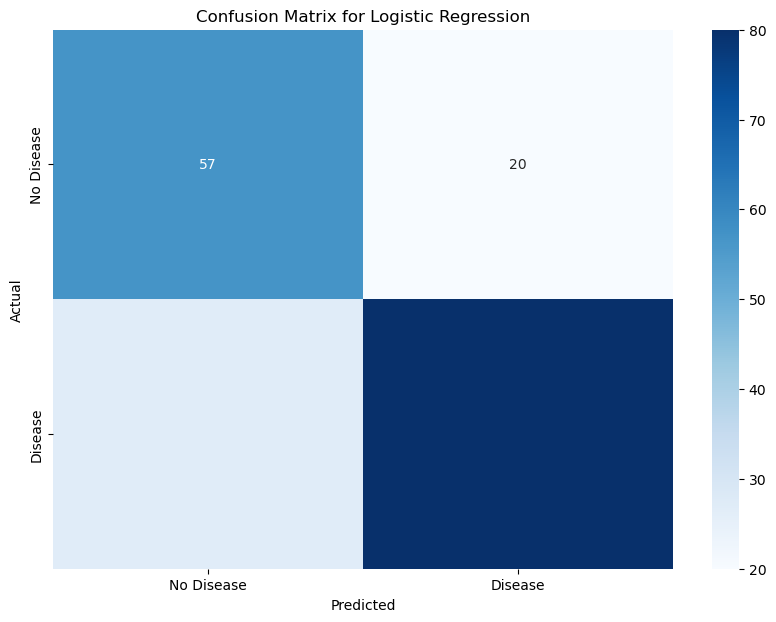

Random Forest Performance:
Correctly Classified Instances: 138
Incorrectly Classified Instances: 46
Accuracy: 0.7500
Precision: 0.7574
Recall: 0.7500
F1 Score: 0.7515
Mean Absolute Error: 0.3419
Root Mean Squared Error: 0.4231
Relative Absolute Error: 0.7025
Root Relative Squared Error: 0.8577
Kappa (F1 Macro Avg): 0.7470
ROC AUC: 0.8126
MCC: 0.4985

Confusion Matrix:
[[59 18]
 [28 79]]

Detailed Accuracy By Class:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72        77
           1       0.81      0.74      0.77       107

    accuracy                           0.75       184
   macro avg       0.75      0.75      0.75       184
weighted avg       0.76      0.75      0.75       184


TP Rate, FP Rate, F-Measure, MCC, ROC Area, PRC Area by Class:
Class 0:
  TP Rate: 0.7662
  FP Rate: 0.2338
  F-Measure: 0.7195
  MCC: 0.4985
  ROC Area: 0.8126
  PRC Area: 0.6782
Class 1:
  TP Rate: 0.7383
  FP Rate: 0.2617
  F-Measure: 0.7745
  MCC: 0

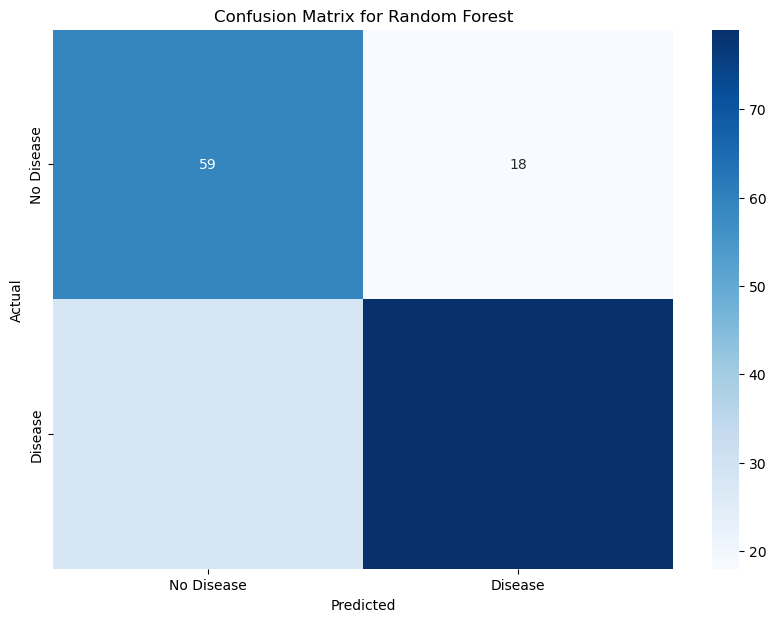

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, average_precision_score, matthews_corrcoef
from sklearn.metrics import mean_absolute_error, mean_squared_error, cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'heart.csv'
df = pd.read_csv(file_path)

# Handle missing values
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.fillna(df.median(), inplace=True)

# Encode categorical data
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_columns)

# Feature scaling
scaler = StandardScaler()
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Split data into features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logreg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(random_state=42)

# Train models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate models
def evaluate_model(y_test, y_pred, y_prob, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    prc_auc = average_precision_score(y_test, y_prob)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    # Additional metrics
    mean_abs_error = mean_absolute_error(y_test, y_prob)
    root_mean_sqr_error = np.sqrt(mean_squared_error(y_test, y_prob))
    kappa_stat = cohen_kappa_score(y_test, y_pred)
    
    # Correctly and incorrectly classified instances
    correct_instances = np.sum(y_pred == y_test)
    incorrect_instances = np.sum(y_pred != y_test)
    
    total_instances = len(y_test)
    
    # Calculate additional metrics
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    relative_absolute_error = mean_abs_error / np.mean(np.abs(y_test - np.mean(y_test)))
    root_relative_squared_error = root_mean_sqr_error / np.sqrt(np.mean(np.square(y_test - np.mean(y_test))))
    
    print(f"{model_name} Performance:")
    print(f"Correctly Classified Instances: {correct_instances}")
    print(f"Incorrectly Classified Instances: {incorrect_instances}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Mean Absolute Error: {mean_abs_error:.4f}")
    print(f"Root Mean Squared Error: {root_mean_sqr_error:.4f}")
    print(f"Relative Absolute Error: {relative_absolute_error:.4f}")
    print(f"Root Relative Squared Error: {root_relative_squared_error:.4f}")
    print(f"Kappa (F1 Macro Avg): {report['macro avg']['f1-score']:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nDetailed Accuracy By Class:")
    print(classification_report(y_test, y_pred))
    
    # Display detailed metrics for each class
    print("\nTP Rate, FP Rate, F-Measure, MCC, ROC Area, PRC Area by Class:")
    for label, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"Class {label}:")
            print(f"  TP Rate: {metrics['recall']:.4f}")
            print(f"  FP Rate: {1 - metrics['recall']:.4f}")
            print(f"  F-Measure: {metrics['f1-score']:.4f}")
            print(f"  MCC: {mcc:.4f}")
            print(f"  ROC Area: {roc_auc:.4f}")
            print(f"  PRC Area: {metrics['precision']:.4f}")

    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_logreg, y_prob_logreg, "Logistic Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, y_prob_rf, "Random Forest")